In [1]:
# import seeing

from seeing import *

In [2]:
# create a Formulary

def oneFunction():
    x, y, a, b = sp.symbols("x y a b")
    return sp.exp(-a*x**2-b*y**2)
    
def anotherFunction():
    x, y, a, b = sp.symbols("x y a b")
    return sp.sin(a*x)**2 + sp.exp(sp.sin(b*y) )

formulas_names = ['oneFunction', 'anotherFunction']
formulas = [oneFunction(), anotherFunction()]

localFormulary = Formulary("A local formulary", formulas_names, formulas)
localFormulary.displayAll()

oneFunction


exp(-a*x**2 - b*y**2)

anotherFunction


exp(sin(b*y)) + sin(a*x)**2

In [3]:
# Save to file

localFormulary.writeToFile("local.frm")

In [4]:
# Load from file

localCopy = Formulary.loadFromFile("local.frm")
localCopy.displayAll()

oneFunction


exp((-a)*x**2 - b*y**2)

anotherFunction


exp(sin(b*y)) + sin(a*x)**2

In [5]:
# access a formula by name

display(localFormulary['oneFunction'])

exp(-a*x**2 - b*y**2)

In [6]:
# substitute Parameters with values using string names

specializedOneFunc = subsParamsByName(localFormulary['oneFunction'], {'a':4, 'b':7 })
display(specializedOneFunc)

exp(-4*x**2 - 7*y**2)

In [13]:
# obtain a numpy or cupy lambda function

import inspect

# you decide which are the free variables and which are the parameters

# cpu
alambda1c = localFormulary.getRestrictedLambda('oneFunction', {'a':4, 'b':7, 'x':0 }, ['x'], modules=cpulib)
alambda2c = localFormulary.getRestrictedLambda('oneFunction', {'x':1.5, 'y':np.pi }, ['a', 'b'], modules=cpulib)
alambda3c = localFormulary.getRestrictedLambda('oneFunction', {'b':1}, ['x', 'y', 'a'], modules=cpulib)
print(inspect.getsource(alambda1c))
print(inspect.getsource(alambda2c))
print(inspect.getsource(alambda3c))
print(alambda1c.__globals__['exp'])

# gpu
alambda1g = localFormulary.getRestrictedLambda('oneFunction', {'a':4, 'b':7, 'x':0 }, ['x'], modules=gpulib)
alambda2g = localFormulary.getRestrictedLambda('oneFunction', {'x':1.5, 'y':np.pi }, ['a', 'b'], modules=gpulib)
alambda3g = localFormulary.getRestrictedLambda('oneFunction', {'b':1}, ['x', 'y', 'a'], modules=gpulib)
print(inspect.getsource(alambda1g))
print(inspect.getsource(alambda2g))
print(inspect.getsource(alambda3g))
print(alambda1g.__globals__['exp'])

# there is a versions of getRestrictedLambda that is not a member of a Formulary, to which you can pass directly a sympy expression

def _lambdifygenerated(x):
    return (exp(-7*y**2))

def _lambdifygenerated(a, b):
    return (exp(-2.25*a - 9.86960440108936*b))

def _lambdifygenerated(x, y, a):
    return (exp(-a*x**2 - y**2))

<function _deprecated.<locals>.wrap.<locals>.call at 0x7f2155b4aea0>
def _lambdifygenerated(x):
    return (exp(-7*y**2))

def _lambdifygenerated(a, b):
    return (exp(-2.25*a - 9.86960440108936*b))

def _lambdifygenerated(x, y, a):
    return (exp(-a*x**2 - y**2))

<ufunc 'cupy_exp'>


In [ ]:
# How to use a Calculator
# Use it evaluate a function over a cetrain domain or to integrate it
# Can be used alone or together with a Formulary

mCalc = Calculator()
# Alone:


# With a Formulary



In [3]:
# Or define an integral
i1 = sp.Integral(f1, (x,-sp.oo,+sp.oo), (y,-sp.oo,+sp.oo))
display(i1)

Integral(exp(-a*x**2 - b*y**2), (x, -oo, oo), (y, -oo, oo))

In [4]:
# Specialize
i2 = i1.subs([(a, 1), (b,2)])
# Evaluate
display(i2.doit())

sqrt(2)*pi/2

In [5]:
#You could also do real symbolic computations… : 
fdev = sp.diff(f1, y) 
display(fdev)

-2*b*y*exp(-a*x**2 - b*y**2)

In [6]:
propMethodsCartesian = Formulary.loadFromFile('Propagation100.frm')

approximations = [
    "Rayleigh-Sommerfeld",
    "Approximate Rayleigh-Sommerfeld",
    "Near Fresnel",
    "Far Fresnel"]

propMethodsCartesian.display(approximations)

FileNotFoundError: [Errno 2] No such file or directory: 'Propagation100.frm'

In [ ]:
waveLength = 10e-6
apertureRadius =  waveLength*10
mCalc = Calculator(cp, cp.float64, 'intensity')
xyCircle = propMethodsCartesian.getFormula('xyCircle')

In [7]:
propMethodsCartesian.display(["Rayleigh-Sommerfeld Arg"])

subdiv_points = 512
#ez0_c =  subsParamsByName( xyCircle, {'a':apertureRadius, 'x_0': 0.1, 'y_0': apertureRadius} )
subsDictC = {'E_0': 1, 'z_1': 2*apertureRadius, 'x_0': 0, 'y_0': apertureRadius, 'lambda': waveLength, 'a':apertureRadius}
paramAndRanges = [( 'x_1', -apertureRadius, apertureRadius, subdiv_points, 'linear' ),
                  ( 'y_1', -apertureRadius, apertureRadius, subdiv_points, 'linear' )]

#xx, ez = propMethodsCartesian.evaluateFormula("Rayleigh-Sommerfeld Arg", subsDictC, paramAndRanges, mCalc)
#fig, ax = plt.subplots(figsize=(10,10))
#ax.imshow( np.real(ez), cmap='hot' )

propMethodsCartesian.plotFormula("Rayleigh-Sommerfeld Arg", subsDictC, paramAndRanges, mCalc)

paramAndRanges = [( 'x_1', -apertureRadius, apertureRadius, subdiv_points, 'linear' )]

subsDictC = {'E_0': 1, 'z_1': 2*apertureRadius, 'y_1':0.0, 'x_0': 0, 'y_0': apertureRadius, 'lambda': waveLength, 'a':apertureRadius}
propMethodsCartesian.plotFormula("Rayleigh-Sommerfeld Arg", subsDictC, paramAndRanges, mCalc)

NameError: name 'propMethodsCartesian' is not defined

In [8]:
subdiv_points = 256
ez0_c =  subsParamsByName( xyCircle, {'a':apertureRadius} )
subsDictC = {'E_0': ez0_c, 'x_1': 0, 'y_1': 0, 'lambda': waveLength, 'a':apertureRadius}
paramAndRange = ( 'z_1', 0.01*apertureRadius, apertureRadius*100, subdiv_points, 'geometric' )

fig, ax = plt.subplots(figsize=(10,5))
plt.xscale('log')
plt.yscale('linear')

for appr in reversed(approximations):
    eeq = propMethodsCartesian.getFormula(appr)
    xplot2, zplot2 = mCalc.IntegralEvalE(subsParamsByName(eeq, subsDictC), [paramAndRange], None, 'trap')
    plt.plot(xplot2[0]/apertureRadius, np.clip(zplot2, -4.5, 4.5), label=appr)
        
plt.legend(loc=(1.0, 0.78))
plt.show()

NameError: name 'xyCircle' is not defined

In [9]:
subdiv_points = 256
ez0_l =  subsParamsByName( xyCircle, {'a':apertureRadius} )
subsDict = {'E_0': ez0_l, 'y_1': 0, 'lambda': waveLength, 'a':apertureRadius}
paramsAndRanges = [ ('x_1', -1.5*apertureRadius, 1.5*apertureRadius, subdiv_points, 'linear'), ('z_1',  waveLength, 15*apertureRadius, subdiv_points, 'linear')]
eeq = propMethodsCartesian.getFormula("Rayleigh-Sommerfeld")

xplot, fplot1 = mCalc.IntegralEvalE(subsParamsByName(eeq, subsDict), paramsAndRanges) 

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow( fplot1, cmap='hot' )

NameError: name 'xyCircle' is not defined

In [10]:
subsDict = {'E_0': ez0_l, 'z_1': 2*apertureRadius, 'lambda': waveLength, 'a':apertureRadius}
paramsAndRanges = [ ('x_1', -2*apertureRadius, 2*apertureRadius, subdiv_points, 'linear'), ('y_1', -2*apertureRadius, 2*apertureRadius, subdiv_points, 'linear')]
eeq = propMethodsCartesian.getFormula("Rayleigh-Sommerfeld")

xplot, fplot1 = mCalc.IntegralEvalE(subsParamsByName(eeq, subsDict), paramsAndRanges) 

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow( np.log(fplot1+1), cmap='hot' )

NameError: name 'ez0_l' is not defined

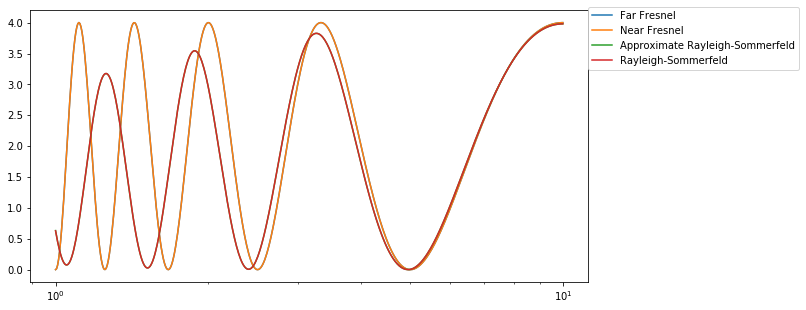

In [7]:
approximationsF = [
    "Rayleigh-Sommerfeld",
    "Far Fresnel"]

fig, ax = plt.subplots(figsize=(10,5))
plt.xscale('log')
plt.yscale('linear')

paramAndRange = ( 'z_1', apertureRadius, apertureRadius*10, 500, 'geometric' )
subsDictC = {'E_0': ez0_l, 'x_1': 0, 'y_1': 0, 'lambda': waveLength, 'a':apertureRadius}

for appr in reversed(approximations):
    eeq = propMethodsCartesian.getFormula(appr)
    xplot2, zplot2 = mCalc.IntegralEvalE(subsParamsByName(eeq, subsDictC), [paramAndRange], [(subdiv_points, 'linear'), (subdiv_points, 'linear')], 'rect')
    plt.plot(xplot2[0]/apertureRadius, np.clip(zplot2, -4.5, 4.5), label=appr)
        
plt.legend(loc=(1.0, 0.78))
plt.show()

Eq(W_phi(rho), Integral(0.0229*(-1)**m_k*2**((-0.5)*KroneckerDelta(0, m_j) - 0.5*KroneckerDelta(0, m_k) + 1)*I**(n_j + n_k)*sqrt((n_j + 1)*(n_k + 1))*(I**(3*m_j + 3*m_k)*cos(theta*(m_j + m_k) + pi*((1 - KroneckerDelta(0, m_j))*((-1)**j - 1) + (1 - KroneckerDelta(0, m_k))*((-1)**k - 1))/4)*besselj(m_j + m_k, 2*pi*f*h*rho) + I**(3*Abs(m_j - m_k))*cos(theta*(m_j - m_k) + pi*((1 - KroneckerDelta(0, m_j))*((-1)**j - 1) - (1 - KroneckerDelta(0, m_k))*((-1)**k - 1))/4)*besselj(Abs(m_j - m_k), 2*pi*f*h*rho))*besselj(n_j + 1, 2*pi*R_1*f)*besselj(n_j + 1, 2*pi*R_2*f)/((pi*R_1*R_2*f*r_0**(5/3)*((1/L_0)**2 + f**2)**(11/6))), (f, f_min, f_max)))

Eq(W_phi(rho), Integral(-0.135193784634899*besselj(2, 8.0*pi*f)**2*besselj(2, 20000*pi*f*rho)/(pi*f*(f**2 + 0.0016)**(11/6)), (f, 0.001, 10)))

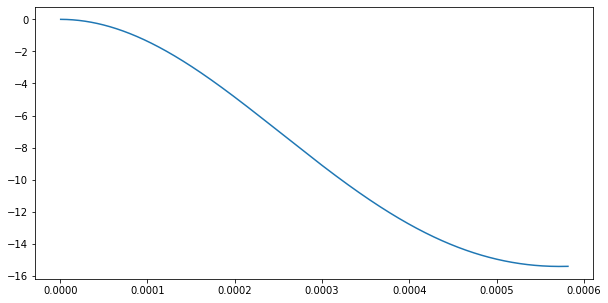

In [9]:
from seeing import *
from zernike import *

#mf.writeToFile('Mavis.frm')
mf = Formulary.loadFromFile('Mavis.frm')

mIt = Integrator(cp, cp.float64, 'none')
covIntegral = mf['ZernikeCovarianceI']
display(covIntegral)

r0_Value = 0.15 # [m]
L0_Value = 25.0 # [m]
TelescopeDiameter = 8.0 #[m]
DM_height = 10000 # [m]

paramsDict = {'f_min':0.001, 'f_max':10, 'theta': np.pi/4.0, 'L_0': L0_Value, 
              'r_0': r0_Value, 'R_1': TelescopeDiameter/2.0, 'R_2': TelescopeDiameter/2.0,
              'h': DM_height }

_integral1 = subsParamsByName( cov_expr_jk(covIntegral, 2, 3), paramsDict)
display(_integral1)

rho_max = 120.0/206265.0
xplot1, zplot1 = mIt.IntegralEvalE(_integral1, [('rho',  0.0, rho_max, 1000, 'linear')], [(1024, 'linear')], method='rect')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xplot1[0], zplot1)
plt.show()